In [30]:
library(nycflights13) # for flights
library(tidyr) # for gather
library(dplyr) # for glimpse
library(tidyverse) # for ggplot2
library(janitor) # for clean_names
library(corrplot) # for corrplot
library(GGally) # for ggpairs

In [52]:
data <- read_csv("../data/cleaned_data.csv")
data <- data |> na.omit()
glimpse(data)

Rows: 253680 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (22): diabetes_012, high_bp, high_chol, chol_check, bmi, smoker, stroke,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 253,680
Columns: 22
$ diabetes_012           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0,…
$ high_bp                <dbl> 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,…
$ high_chol              <dbl> 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,…
$ chol_check             <dbl> 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ bmi                    <dbl> 40, 25, 28, 27, 24, 25, 30, 25, 30, 24, 25, 34,…
$ smoker                 <dbl> 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,…
$ stroke                 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,…
$ heart_diseaseor_attack <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,…
$ phys_activity          <dbl> 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,…
$ fruits                 <dbl> 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,…
$ veggies                <dbl> 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,…
$ hvy_alcohol_consump    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ any_healthca

# Biểu diễn phân bố Quantitative Data

## BMI

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.00   24.00   27.00   28.38   31.00   98.00 

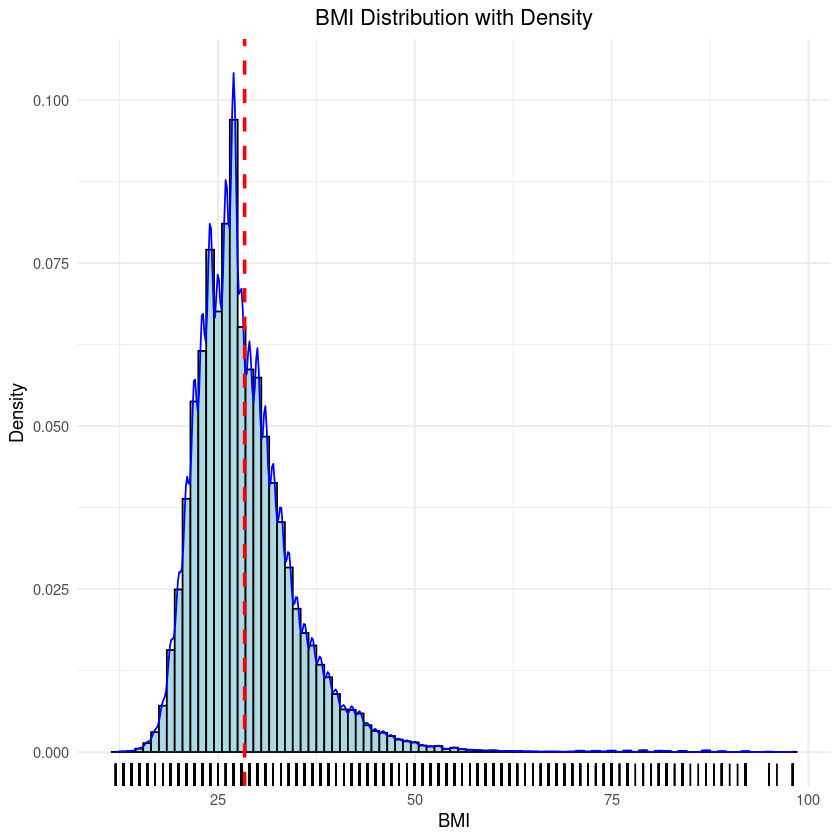

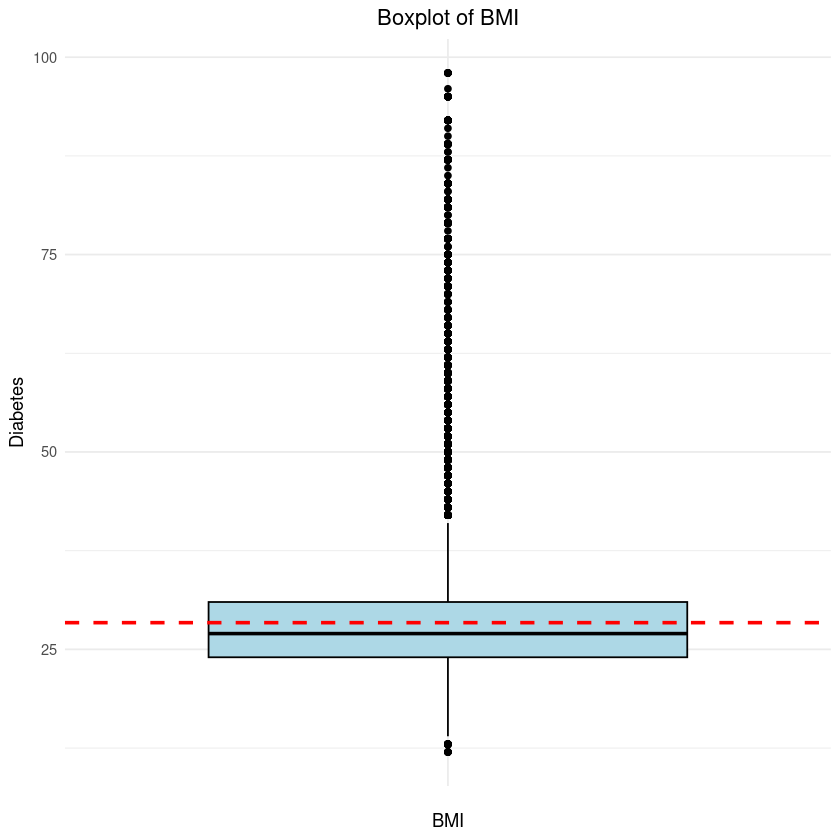

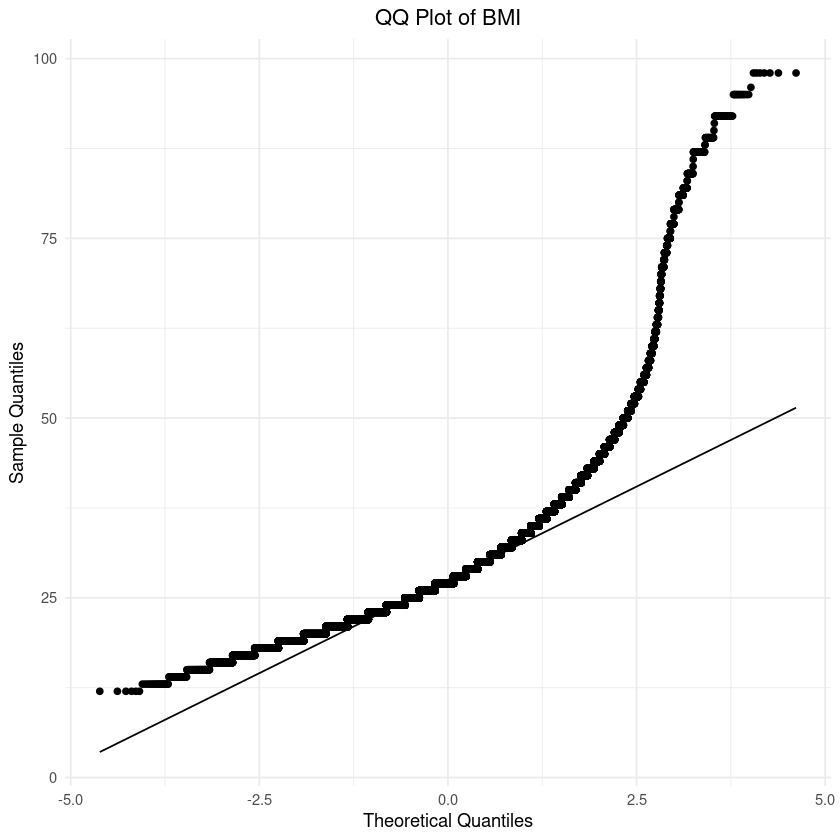

In [58]:
summary(data$bmi)

ggplot(data = data, aes(x = bmi)) + 
    geom_histogram(aes(y = ..density..), binwidth = 1, fill = "lightblue", color = "black", bins = 30) + 
    geom_density(color = "blue", bw = "nrd0", kernel = "gaussian") + 
    geom_rug() +
    labs(title = "BMI Distribution with Density", x = "BMI", y = "Density") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5)) +
    geom_vline(aes(xintercept = mean(bmi)), color = "red", linetype = "dashed", size = 1)

ggplot(data = data, aes(x = "", y = bmi)) + 
    geom_boxplot(fill = "lightblue", color = "black") + 
    labs(title = "Boxplot of BMI", x = "BMI", y = "Diabetes") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5)) +
    geom_hline(aes(yintercept = mean(bmi)), color = "red", linetype = "dashed", size = 1)

ggplot(data = data, aes(sample = bmi)) + 
    stat_qq() + 
    stat_qq_line() + 
    labs(title = "QQ Plot of BMI", x = "Theoretical Quantiles", y = "Sample Quantiles") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))

### 1. Tổng quan qua các chỉ số thống kê

- **Min = 12**: Thấp nhất là 12, về mặt y học thì BMI dưới ~13 là rất thấp (có thể gặp ở một số trường hợp suy dinh dưỡng hay dữ liệu ngoại lai).
- **1st Qu. = 24**: Phân vị thứ nhất xấp xỉ 24, ở ngưỡng cận trên của “bình thường” (18.5–24.9).
- **Median = 27**: Trung vị BMI là 27, rơi vào nhóm “overweight” (25–29.9).
- **Mean = 28.38**: Trung bình BMI cao hơn trung vị, cho thấy **phân phối lệch phải** (right-skewed).
- **3rd Qu. = 31**: Phân vị thứ ba là 31, nằm trong khoảng béo phì cấp độ 1 (≥30).
- **Max = 98**: Mức tối đa lên tới 98, rõ ràng là một giá trị ngoại lai cực lớn, khẳng định có **một số lượng ít** người với BMI rất cao.

Độ chênh lệch giữa **Mean (28.38)** và **Median (27)** (~1.4 đơn vị) không quá lớn, nhưng **phần đuôi phải** (right tail) rất dài và “đậm đặc outlier” (thể hiện rõ ở Boxplot) khiến phân phối trở nên **mất đối xứng**.

### 2. Phân phối BMI (Histogram + Density)

1. **Dạng phân phối**:  
   - Histogram cho thấy một **đỉnh** (mode) nằm gần **25–26**.  
   - Phân phối **lệch phải (right-skewed)** rõ rệt; phía phải (các giá trị lớn) giảm dần nhưng kéo dài đến tận 70, 80, 90, thậm chí 98.
2. **So sánh với đường mật độ (blue line)**: Đường mật độ trùng khớp với việc có một đỉnh khoảng 25–26 và giảm dốc khi BMI > 30, tuy nhiên vẫn “bò” dài về bên phải.
3. **Mối tương quan Mean–Median**:  
   - Mean (28.38) > Median (27) → phù hợp với skew phải.  
   - Giá trị 25 (đường vạch đứt đỏ) là ngưỡng overweight, và rõ ràng một bộ phận lớn dân số khảo sát nằm **phía trên** ngưỡng này.

### 3. Boxplot of BMI

1. **Vị trí hộp dữ liệu**:  
   - Hộp (box) nằm trong khoảng [24, 31] (tức Q1–Q3), với Median = 27.  
   - Khoảng IQR = 31 – 24 = 7, không quá lớn so với toàn thang đo, nhưng do có nhiều outlier phía trên nên khi tính “phạm vi” (upper fence) bằng $Q3 + 1.5*IQR = 31 + 1.5\times 7 = 31 + 10.5 = 41.5$, vẫn còn **rất nhiều** giá trị BMI > 41.5 được xếp thành outlier.
2. **Outliers cực lớn**: Ta thấy rất nhiều điểm “nằm rải rác” từ 45, 50, 60… đến 98. Điều này cho thấy **phân phối lệch phải** kèm theo “đuôi” rất dài, tạo ra một loạt giá trị ngoại lai.
3. **Ý nghĩa thực tiễn**:  
   - Về y tế công cộng, BMI > 30 (béo phì) đã là nhóm nguy cơ, cao hơn nữa như 40, 50, 60 là béo phì bệnh lý (morbid obesity).  
   - Rõ ràng, mẫu dữ liệu gồm nhiều cá nhân đang gặp tình trạng thừa cân, béo phì nặng.

### 4. QQ Plot (Phân phối so với Normal)

Quan sát QQ plot, ta thấy:
1. **Khúc giữa**: Dữ liệu ở dải giữa (khoảng 20–35) cong lên, sau đó “bẻ cong” mạnh ra khỏi đường chéo lý thuyết.  
2. **Phần đuôi dưới** (BMI rất thấp) nằm **phía trên** đường lý thuyết ⇒ tail trái không quá dài (và có thể có một vài outlier thấp ~12).  
3. **Phần đuôi trên** (BMI rất cao) **vượt hẳn** lên khỏi đường chuẩn, cho thấy sự **phình to** của đuôi phải ⇒ nặng outlier bên phải.  

Tổng thể, QQ plot xác nhận BMI **không tuân theo phân phối chuẩn** (normal distribution), mà **lệch phải** rất rõ. 

### 5. Một số gợi ý xử lý thống kê / tiền xử lý

1. **Loại bỏ hoặc xử lý outliers**:  
   - Các giá trị BMI cực cao (70, 80, 90…) có thể ảnh hưởng mạnh đến một số mô hình **nhạy cảm với outliers** (ví dụ: linear regression).  
   - Trước khi làm mô hình (nhất là classification), ta cân nhắc:
     - Loại bỏ outliers bằng quy tắc IQR (nếu cảm thấy đó là dữ liệu sai sót hoặc quá hiếm).  
     - Hoặc **giữ lại** nếu đó là dữ liệu thật, vì trong y khoa, các trường hợp BMI > 40 thực ra vẫn có tỉ lệ mắc tiểu đường, bệnh tim mạch cao, nên có giá trị dự báo.
2. **Biến đổi (transformation)**:  
   - Có thể thử **log transform** (log(BMI)) hoặc **power transform** để giảm độ lệch phải. Tuy nhiên, BMI vốn đã là chỉ số được tính từ cân nặng/chiều cao, nên việc log-transform có thể khiến diễn giải lâm sàng khó hơn.  
   - Hoặc sử dụng **robust scaling** (đưa median về 0, IQR về 1) để bớt ảnh hưởng của outliers.
3. **Binning / Discretization**:  
   - Phổ biến trong nghiên cứu lâm sàng, BMI thường chia thành nhóm: underweight (<18.5), normal (18.5–24.9), overweight (25–29.9), obese I (30–34.9), obese II (35–39.9), obese III (≥40).  
   - Việc chia nhóm có thể giúp mô hình “dễ” xử lý hơn, nhất là mô hình tree-based, đồng thời dễ giải thích về mặt y học (phân loại nguy cơ).

## Mental Health

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   3.185   2.000  30.000 

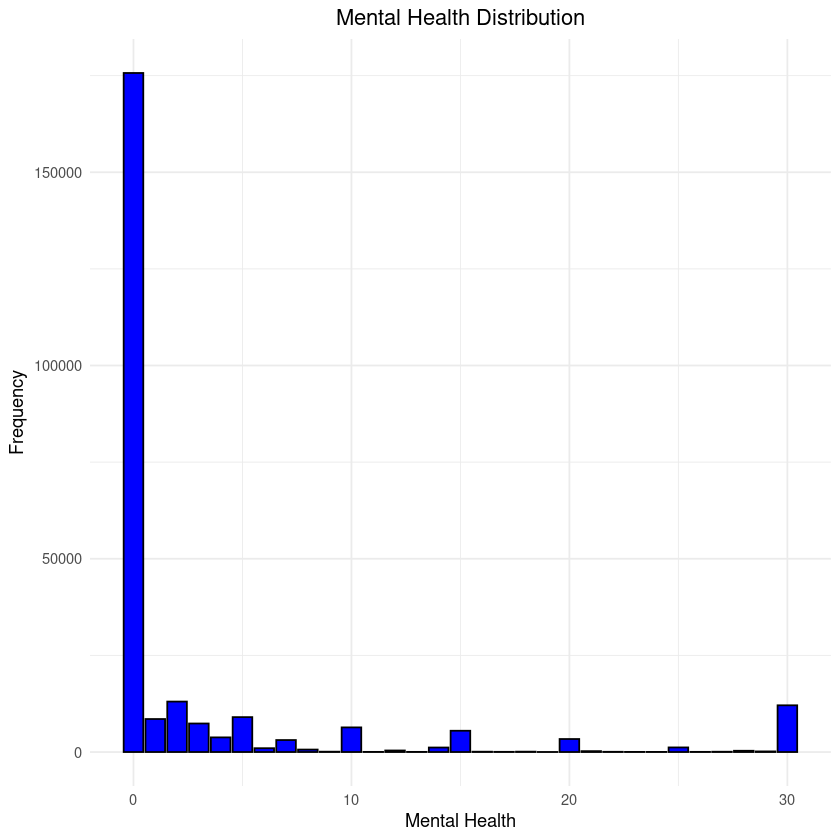

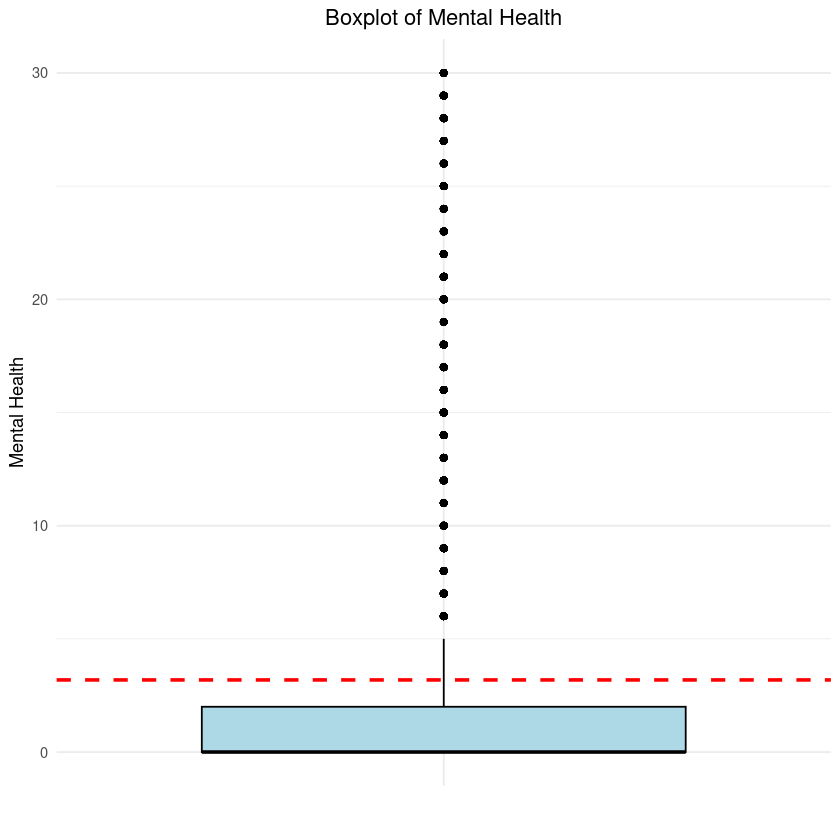

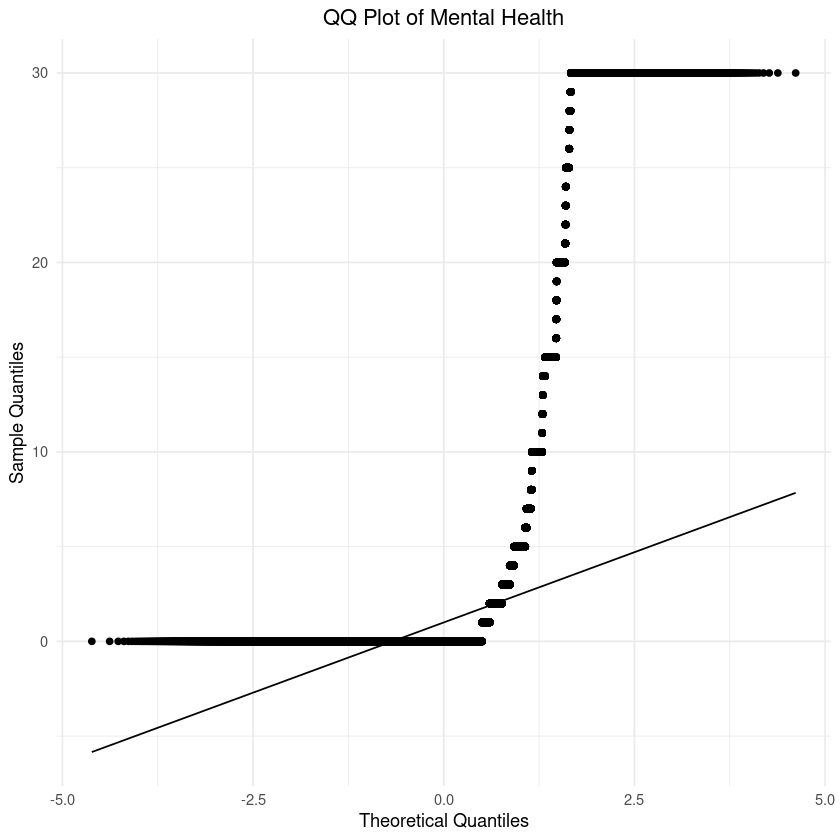

In [60]:
summary(data$ment_hlth)

ggplot(data = data, aes(x = ment_hlth)) + 
    geom_bar(fill = "blue", color = "black") +
    labs(title = "Mental Health Distribution", x = "Mental Health", y = "Frequency") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))

ggplot(data = data, aes(x = "", y = ment_hlth)) + 
    geom_boxplot(fill = "lightblue", color = "black") +
    labs(title = "Boxplot of Mental Health", x = "", y = "Mental Health") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5)) +
    geom_hline(aes(yintercept = mean(ment_hlth)), color = "red", linetype = "dashed", size = 1)

ggplot(data = data, aes(sample = ment_hlth)) +
    stat_qq() +
    stat_qq_line() +
    labs(title = "QQ Plot of Mental Health", x = "Theoretical Quantiles", y = "Sample Quantiles") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))

### 1. Tổng quan qua các chỉ số thống kê

- **Min = 0, Q1 = 0, Median = 0**: Điều này cho thấy **hơn 50%** (thực tế là >50%) giá trị trong dữ liệu là **0** ngày “mental health not good”. Nói cách khác, một bộ phận lớn người tham gia không gặp vấn đề gì về sức khoẻ tinh thần trong 30 ngày qua (hoặc họ ghi nhận là 0).
- **Mean = 3.185**: Trung bình lại cao hơn hẳn so với median = 0, chứng tỏ **phân phối bị lệch phải rất mạnh** (right-skewed), và có một số lượng đáng kể người có nhiều ngày “mental health not good”.  
- **Q3 = 2**: Tức 75% dữ liệu có số ngày ≤ 2. 
- **Max = 30**: Có người báo cáo **tối đa 30 ngày** gặp vấn đề về sức khoẻ tinh thần, cũng có thể xem là outlier (nhưng về mặt thực tiễn thì vẫn xảy ra).

Như vậy, **đa số** mẫu nằm ở 0 (không ngày gặp vấn đề), còn một **nhóm nhỏ** có giá trị rất cao (tới 30 ngày).

### 2. Phân phối Mental Health (Histogram)

1. **Hiện tượng “spike” tại 0**  
   - Trên histogram, cột ở **0** (nghĩa là 0 ngày “not good”) áp đảo, chiếm phần lớn mẫu.  
   - Sau đó, tần suất giảm cực nhanh khi số ngày tăng lên.  
   - Một số “cụm” nhỏ xuất hiện ở 1–2 ngày, 3–5 ngày, v.v… và một số ít trường hợp vọt lên 30 ngày.
2. **Dạng phân phối rời (count data)**  
   - Biến này có thể là biến đếm (integer từ 0 đến 30).  
   - Rất nhiều “zero” → gợi ý khả năng **zero-inflated** hoặc **hết sức lệch phải**.

### 3. Boxplot of Mental Health

1. **Vị trí hộp**:  
   - Do Q1 = 0, Median = 0 và Q3 = 2, nên **hộp** (box) ở sát đáy, tập trung gần 0–2.  
   - IQR = Q3 – Q1 = 2 – 0 = 2, khá nhỏ so với toàn thang đo (0–30).
2. **Outliers dày đặc**:  
   - Whisker trên (upper fence) thường được tính là `Q3 + 1.5*IQR = 2 + 1.5*2 = 5`. Vậy nên bất cứ giá trị > 5 đều bị xem là outlier theo định nghĩa boxplot.  
   - Quan sát cho thấy có rất nhiều điểm từ 6 đến 30 (nhất là cụm 30) vươn thành một *cột* outlier kéo dài thẳng lên.  

### 4. QQ Plot

1. **Phần lớn giá trị ở 0**: QQ plot cho thấy một **dải phẳng** ở gần 0, do quá nhiều quan sát bằng 0.  
2. **Đuôi phải vọt rất cao**:  
   - Khi >5, số ngày mental health tăng và ngày càng “chệch” khỏi đường thẳng chuẩn.  
   - Ở đoạn trên cùng (gần 30), ta thấy nhiều điểm nằm sát nhau, càng bộc lộ rõ sự lệch phải và **không** tương thích với phân phối chuẩn.
3. **Tóm lại**: Dữ liệu hoàn toàn **không** tuân theo normal distribution. Thay vào đó, nó giống một **biến đếm** (count) có số lượng 0 rất lớn (zero-inflated) và một đuôi phải kéo dài.

### 5. Hệ quả và gợi ý phân tích

1. **Không dùng giả định normal**  
   - Dữ liệu này *không* thích hợp để áp dụng trực tiếp các mô hình/kiểm định đòi hỏi phân phối chuẩn.  
   - Nếu phân tích tương quan (chẳng hạn với Pearson), kết quả có thể sai lệch.
2. **Biến đổi dữ liệu**  
   - *Log-transform* (ví dụ $\log(x+1)$) hay *sqrt-transform* có thể giảm bớt độ lệch. Nhưng vẫn phải chú ý bản chất rời rạc (count) và việc 0 chiếm áp đảo.  
   - Đôi khi, mô hình **Poisson** hay **Negative Binomial** (hoặc **zero-inflated** versions) mới phù hợp nếu ta cần *modeling* biến này như một biến phụ thuộc.
3. **Phân nhóm (binning)**  
   - Trong các bài toán classification, ta thường chia “mental health days” thành các nhóm ý nghĩa:  
     - Không ngày (0)  
     - Vài ngày (1–2, 3–5, …)  
     - Nhiều ngày (≥14, hoặc ≥20, 30…) – tuỳ mục tiêu.  
   - Cách này giúp xử lý tình trạng zero-inflation và dễ diễn giải trong lâm sàng (ví dụ “>=14 ngày” thường được xếp nhóm “nặng”).
4. **Xác thực outliers hay không:** Các giá trị 30 ngày có thể là *hoàn toàn hợp lý* về mặt lâm sàng (người bị trầm cảm dai dẳng suốt tháng). Không nhất thiết loại bỏ, mà nên xử lý bằng mô hình thống kê phù hợp.

# Physical Health

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   4.242   3.000  30.000 

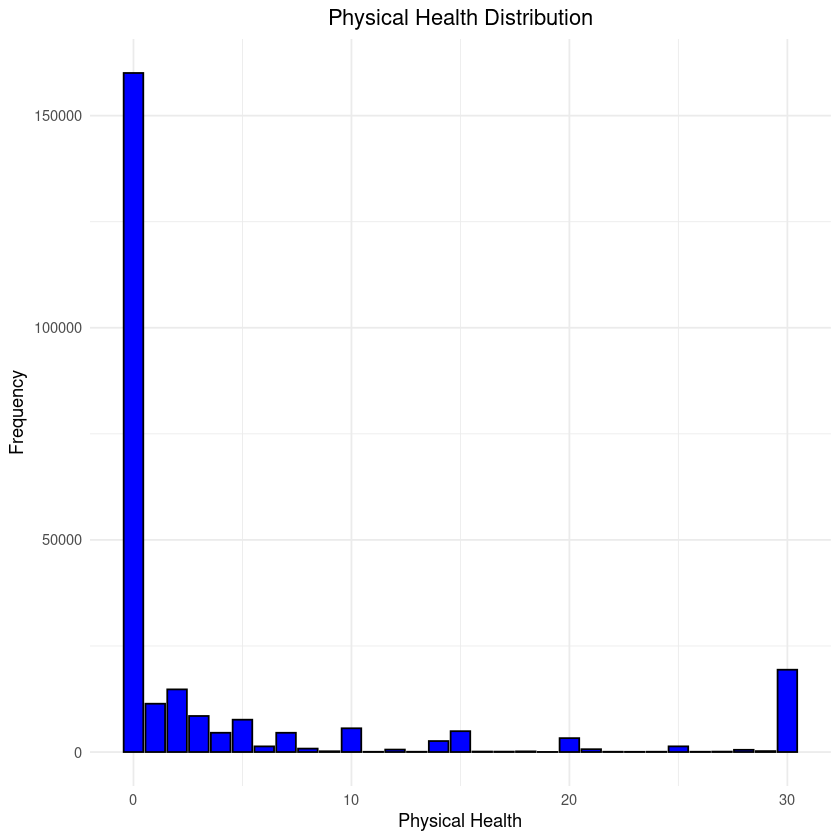

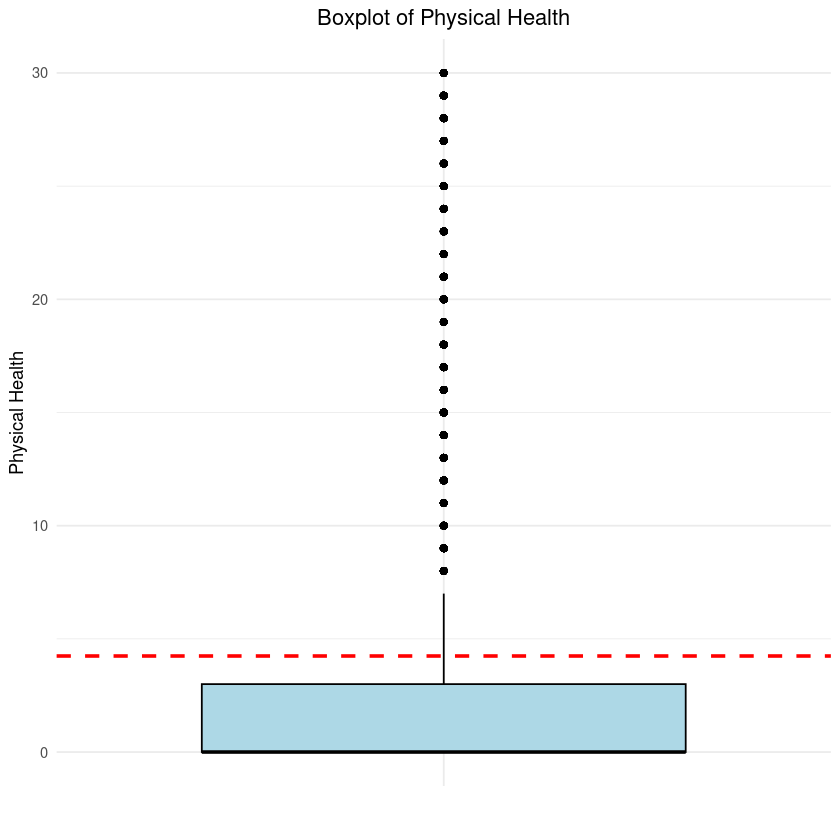

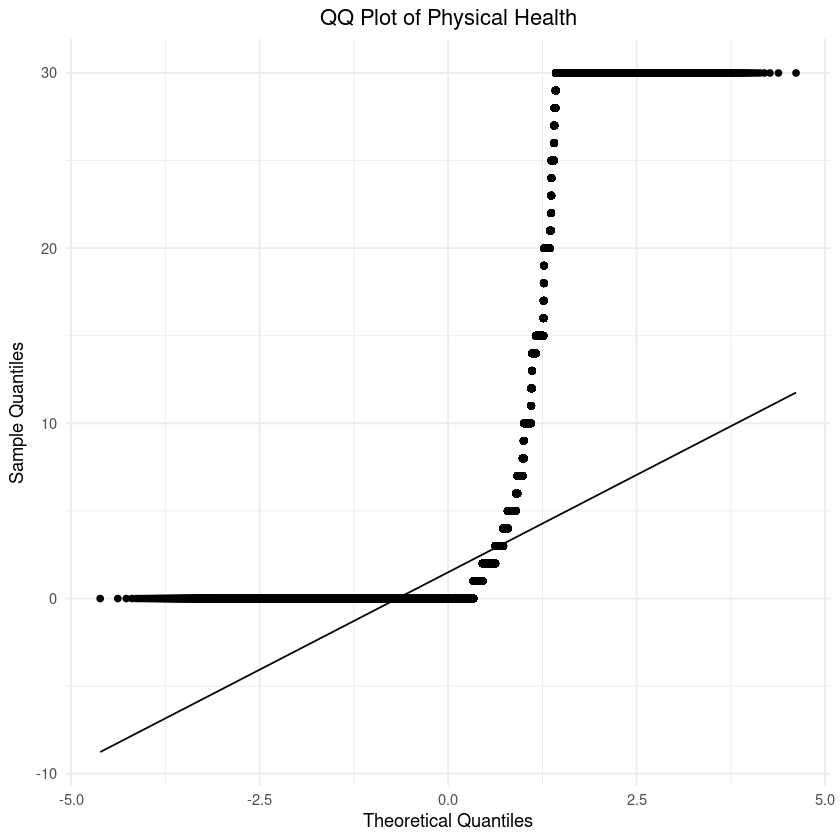

In [61]:
summary(data$phys_hlth)

ggplot(data = data, aes(x = phys_hlth)) +
    geom_bar(fill = "blue", color = "black") +
    labs(title = "Physical Health Distribution", x = "Physical Health", y = "Frequency") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))

ggplot(data = data, aes(x = "", y = phys_hlth)) +
    geom_boxplot(fill = "lightblue", color = "black") +
    labs(title = "Boxplot of Physical Health", x = "", y = "Physical Health") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5)) +
    geom_hline(aes(yintercept = mean(phys_hlth)), color = "red", linetype = "dashed", size = 1)

ggplot(data = data, aes(sample = phys_hlth)) +
    stat_qq() +
    stat_qq_line() +
    labs(title = "QQ Plot of Physical Health", x = "Theoretical Quantiles", y = "Sample Quantiles") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))

# Biểu diễn phân bố giữa các Quantitative Data

In [35]:
quantitative_data <- data.frame(
  BMI = data$bmi,
  MentHlth = data$ment_hlth,
  PhysHlth = data$phys_hlth
)

In [36]:
quantitative_data <- na.omit(quantitative_data)

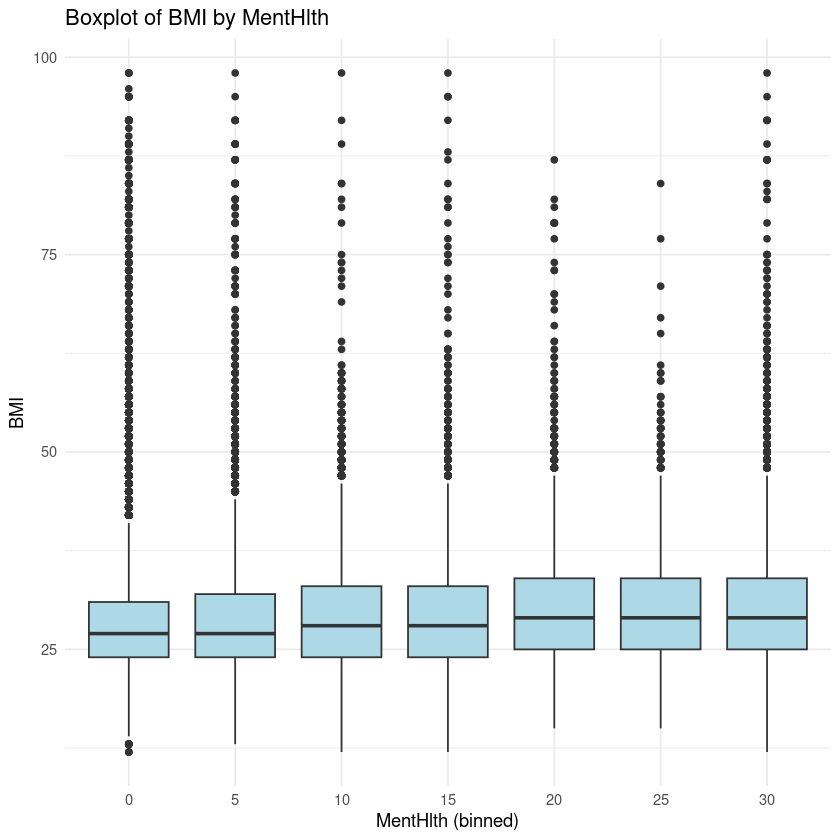

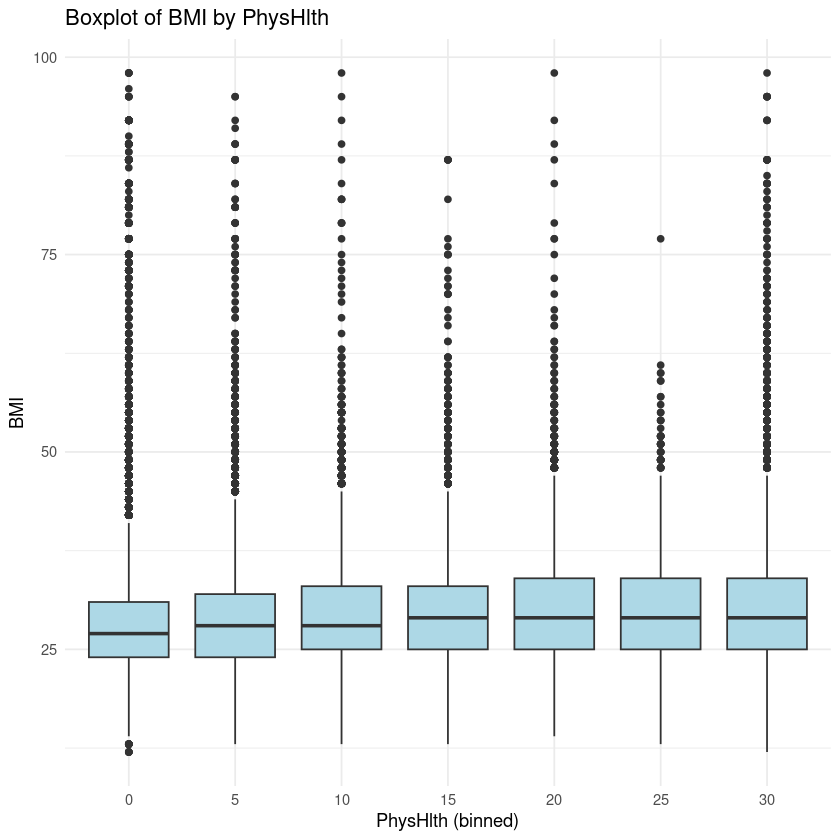

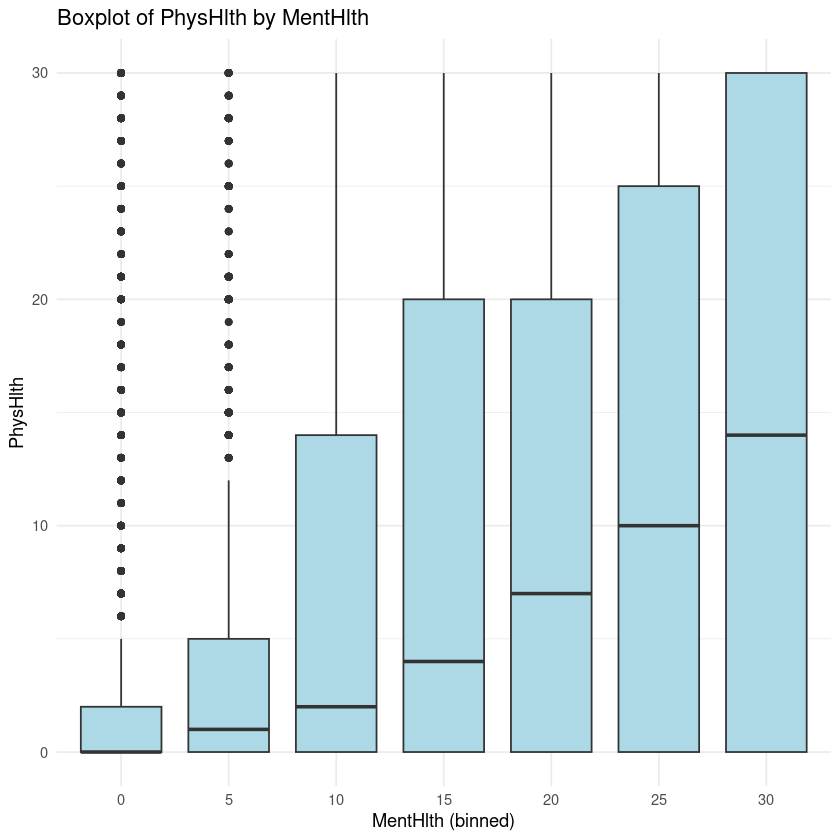

In [37]:
ggplot(quantitative_data, aes(x = factor(round(MentHlth/5)*5), y = BMI)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Boxplot of BMI by MentHlth", x = "MentHlth (binned)", y = "BMI") +
  theme_minimal()

ggplot(quantitative_data, aes(x = factor(round(PhysHlth/5)*5), y = BMI)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Boxplot of BMI by PhysHlth", x = "PhysHlth (binned)", y = "BMI") +
  theme_minimal()

ggplot(quantitative_data, aes(x = factor(round(MentHlth/5)*5), y = PhysHlth)) +
  geom_boxplot(fill = "lightblue") +
  labs(title = "Boxplot of PhysHlth by MentHlth", x = "MentHlth (binned)", y = "PhysHlth") +
  theme_minimal()

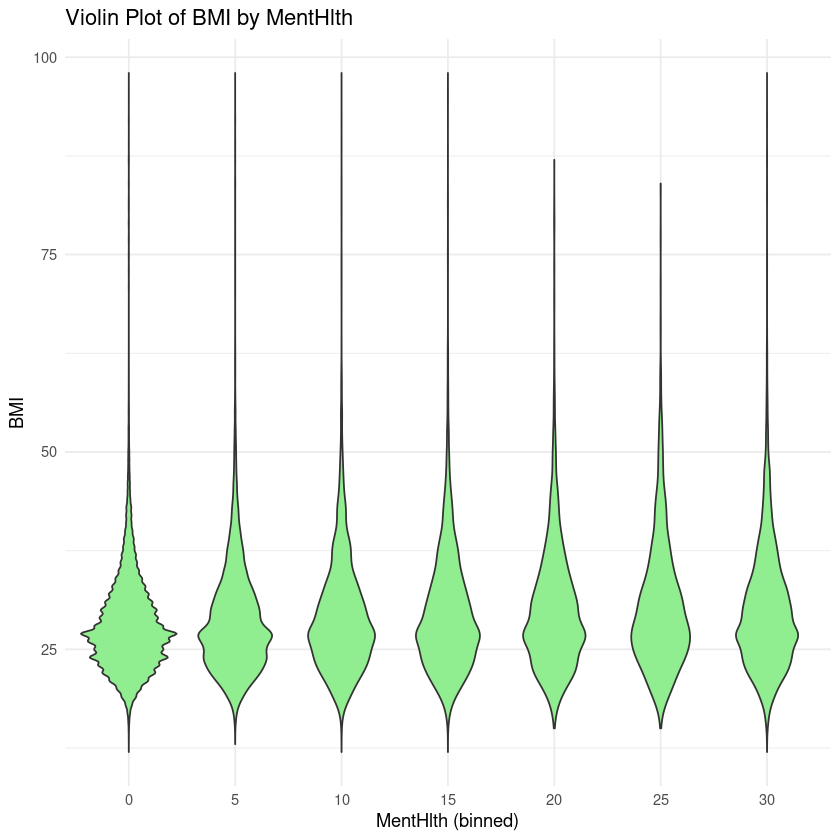

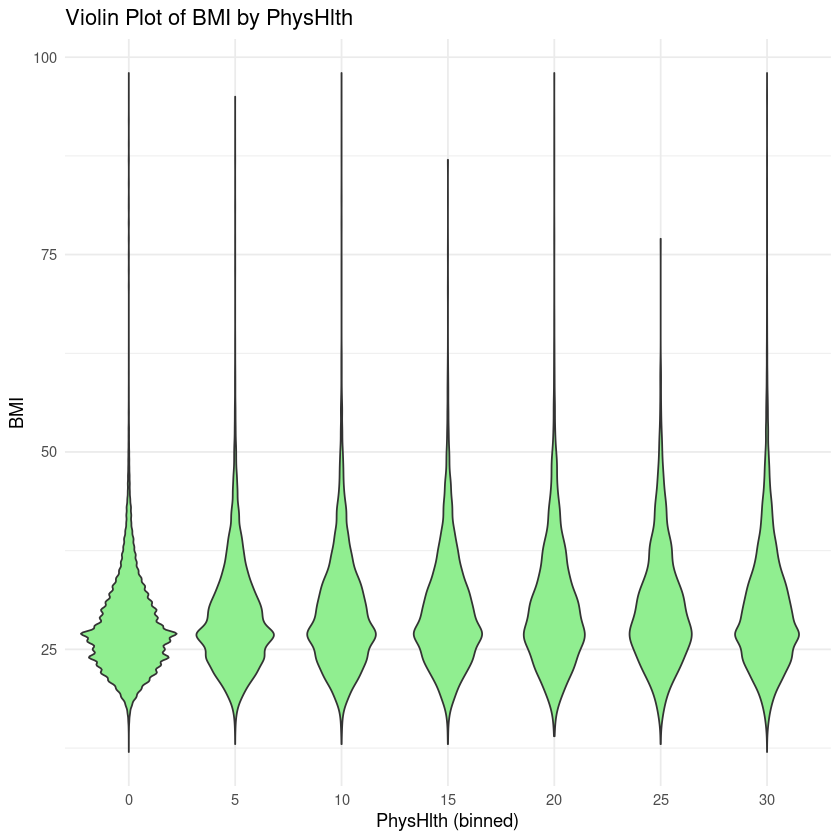

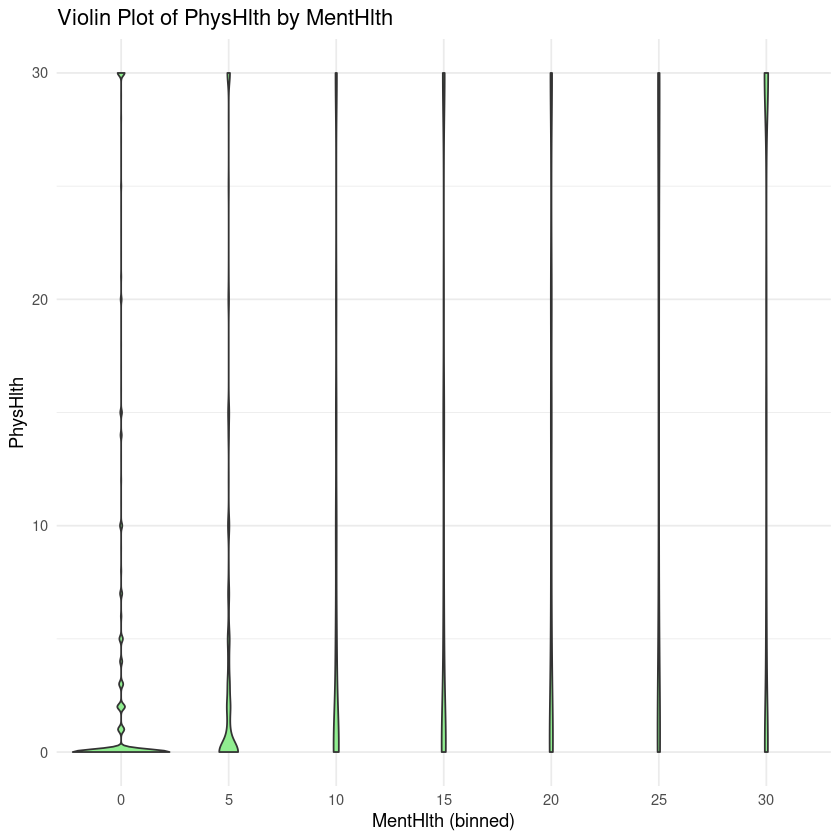

In [38]:
ggplot(quantitative_data, aes(x = factor(round(MentHlth/5)*5), y = BMI)) +
  geom_violin(fill = "lightgreen") +
  labs(title = "Violin Plot of BMI by MentHlth", x = "MentHlth (binned)", y = "BMI") +
  theme_minimal()

ggplot(quantitative_data, aes(x = factor(round(PhysHlth/5)*5), y = BMI)) +
  geom_violin(fill = "lightgreen") +
  labs(title = "Violin Plot of BMI by PhysHlth", x = "PhysHlth (binned)", y = "BMI") +
  theme_minimal()

ggplot(quantitative_data, aes(x = factor(round(MentHlth/5)*5), y = PhysHlth)) +
  geom_violin(fill = "lightgreen") +
  labs(title = "Violin Plot of PhysHlth by MentHlth", x = "MentHlth (binned)", y = "PhysHlth") +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


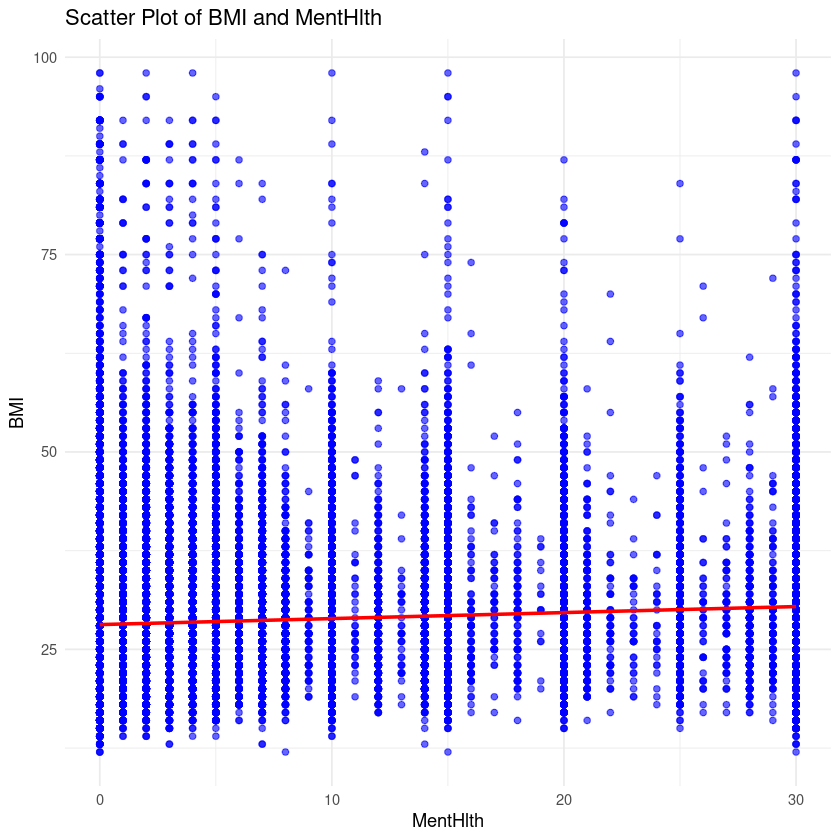

`geom_smooth()` using formula = 'y ~ x'


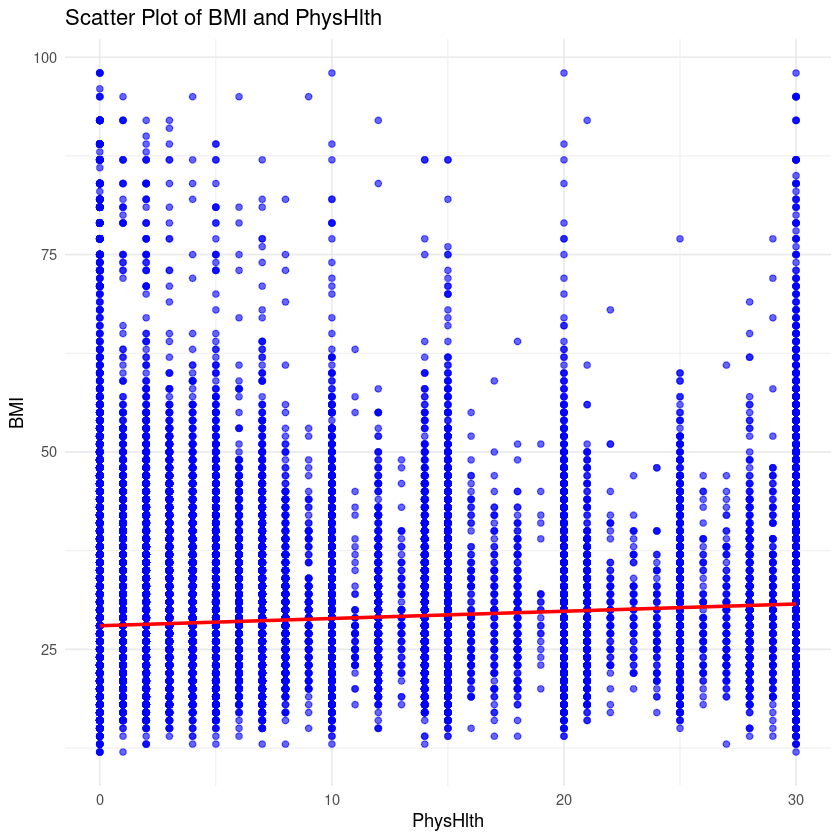

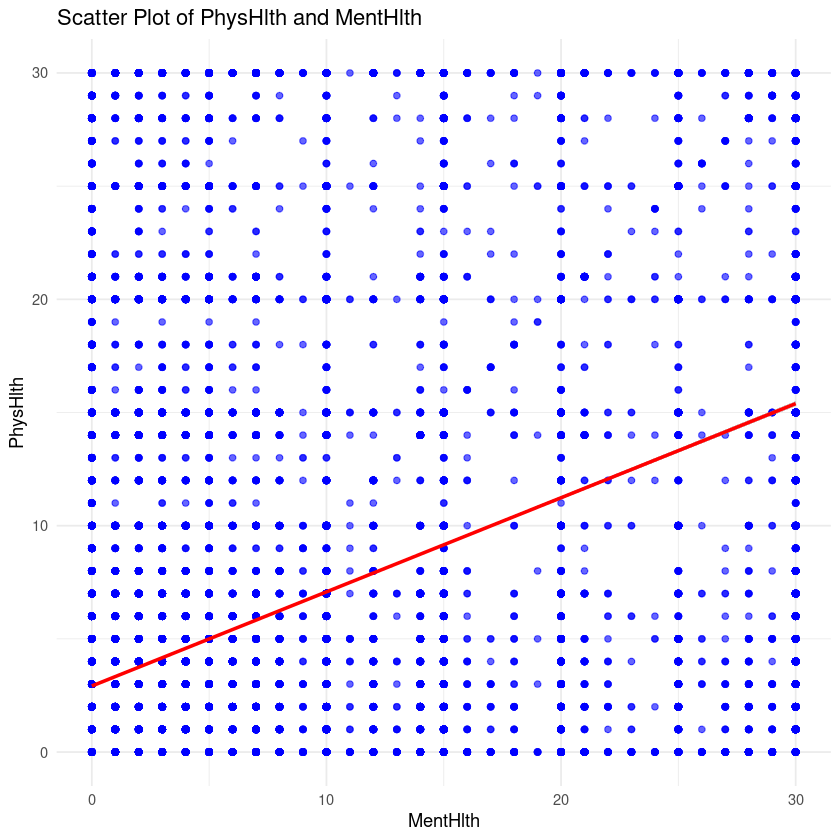

In [39]:
ggplot(quantitative_data, aes(x = MentHlth, y = BMI)) +
  geom_point(alpha = 0.6, color = "blue") +
  geom_smooth(method = "lm", color = "red") +
  labs(title = "Scatter Plot of BMI and MentHlth", x = "MentHlth", y = "BMI") +
  theme_minimal()

ggplot(quantitative_data, aes(x = PhysHlth, y = BMI)) +
    geom_point(alpha = 0.6, color = "blue") +
    geom_smooth(method = "lm", color = "red") +
    labs(title = "Scatter Plot of BMI and PhysHlth", x = "PhysHlth", y = "BMI") +
    theme_minimal()

ggplot(quantitative_data, aes(x = MentHlth, y = PhysHlth)) +
    geom_point(alpha = 0.6, color = "blue") +
    geom_smooth(method = "lm", color = "red") +
    labs(title = "Scatter Plot of PhysHlth and MentHlth", x = "MentHlth", y = "PhysHlth") +
    theme_minimal()

### 1. Quan sát mối quan hệ: **BMI** ~ **MentHlth** và **BMI** ~ **PhysHlth**

#### 1.1 Boxplot/Violin plot: BMI theo MentHlth (hoặc PhysHlth)

- **Dáng phân phối BMI gần như giống nhau** ở hầu hết các “bin” của MentHlth/PhysHlth. Tức median của BMI ở mỗi bin đều xoay quanh ~25–26, IQR cũng xấp xỉ 7–8 đơn vị (khoảng [22–30]) và vô số outlier vươn lên tới 80–100.  
- **Không thấy xu hướng tăng/giảm rõ rệt** của BMI khi MentHlth/PhysHlth tăng. Vẫn có dao động nhỏ ở median (ví dụ bin MentHlth=0 có median ~25, bin MentHlth=30 có median ~26...), nhưng độ chênh lệch không quá đáng kể so với độ trải rộng chung.  

Từ đó, có vẻ **không** có mối liên hệ mạnh giữa “số ngày sức khỏe tinh thần/thể chất kém” với chỉ số BMI. Nói cách khác, ở mọi mức MentHlth/PhysHlth, ta đều gặp đủ loại BMI từ thấp (15–20) đến rất cao (70–100).

#### 1.2 Scatter plot: BMI ~ MentHlth (hoặc PhysHlth)

- Các scatter plot cho thấy **một “mảng” dày** ở vùng BMI ~25 và MentHlth/PhysHlth = 0 (vì rất nhiều quan sát 0 ngày kém).  
- Khi MentHlth/PhysHlth tăng, BMI vẫn phân bố trải rộng 15–100, không thu hẹp hay dịch chuyển nhiều.  
- Đường hồi quy (màu đỏ) thể hiện **độ dốc (slope) hơi dương** nhưng rất nhỏ → gợi ý **nếu có tương quan** thì cũng yếu (r-value có thể rất thấp).

#### Kết luận sơ bộ:
> **BMI** hầu như **không** tương quan mạnh với **MentHlth** hay **PhysHlth**; mọi nhóm ngày “kém” vẫn có “bình quân” BMI khá tương đồng.  

### 2. Quan sát mối quan hệ: **PhysHlth** ~ **MentHlth**

#### 2.1 Boxplot/Violin plot: PhysHlth theo MentHlth

- Khi **MentHlth** = 0 (tức không ngày sức khỏe tinh thần kém), median của **PhysHlth** cũng khá thấp (~0–1).  
- Khi MentHlth tăng dần (5, 10, 15…), median của PhysHlth **có xu hướng tăng**. Nhìn boxplot:
  - Ở MentHlth=10, median PhysHlth nhích lên khoảng 5–7
  - Ở MentHlth=20, median PhysHlth ~10
  - Ở MentHlth=30, median PhysHlth còn cao hơn nữa (~15 hoặc hơn)
- Như vậy, có vẻ **người có nhiều ngày sức khỏe tinh thần kém** thường **kèm theo** nhiều ngày sức khỏe thể chất kém.  

#### 2.2 Scatter plot: PhysHlth ~ MentHlth

- Dễ thấy từng “cột dọc” (theo MentHlth = 0, 1, 2… 30) và “hàng ngang” (theo PhysHlth = 0, 1, 2… 30), vì hai biến này đều là dạng đếm trong [0..30].  
- Đường hồi quy đỏ có **độ dốc dương** rõ hơn so với BMI ~ MentHlth/PhysHlth.  
- Có thể có hệ số tương quan (Spearman/Pearson) ở mức **trung bình** hoặc hơn. Quan sát biểu đồ “Scatter Plot of PhysHlth and MentHlth” cho thấy **càng MentHlth cao → PhysHlth trung bình càng cao**.

#### Kết luận sơ bộ:
> **MentHlth** và **PhysHlth** dường như có **mối liên hệ đồng biến**: khi số ngày gặp vấn đề về tinh thần tăng, thì số ngày thể chất kém cũng tăng.  

### 3. Một vài gợi ý phân tích thống kê sâu hơn

1. **Kiểm định tương quan**  
   - Với biến đếm (0–30 ngày), dùng **Spearman’s rank correlation** có thể phù hợp hơn Pearson.  
   - Kỳ vọng: $\rho(\mathrm{MentHlth}, \mathrm{PhysHlth})$ > 0, có ý nghĩa thống kê.  
   - Trong khi $\rho(\mathrm{MentHlth}, \mathrm{BMI})$ và $\rho(\mathrm{PhysHlth}, \mathrm{BMI})$ có thể rất nhỏ (không ý nghĩa hoặc ý nghĩa yếu).
2. **Phân tích thêm**  
   - Nếu muốn, ta có thể **so sánh** trung bình BMI giữa các nhóm MentHlth/PhysHlth (VD: group = {0 ngày, >0 ngày}) qua t-test hoặc Mann-Whitney. Tuy nhiên, theo biểu đồ, khác biệt sẽ không lớn.  
   - Cũng có thể **phân tầng** (stratify) theo MentHlth/PhysHlth để xem tỉ lệ “diabetes_012” hay tỉ lệ “high_BMI ≥30” khác nhau không.
3. **Trong mô hình classification**  
   - MentHlth và PhysHlth có thể (một phần) trùng lặp thông tin vì chúng dương tương quan. Có thể ta cần regularization hoặc tree-based model để tự chọn ra biến mạnh hơn.  
   - BMI nhìn chung không bị phụ thuộc nhiều vào MentHlth/PhysHlth, nên không lo đa cộng tuyến, nhưng nó là biến quan trọng để dự đoán diabetes.

### 4. Kết luận

- **BMI** gần như **không đổi** (hoặc chỉ tăng nhẹ) khi MentHlth/PhysHlth tăng: median quanh 25–26, độ trải rộng rất lớn ở mọi bin.  
- **MentHlth** và **PhysHlth** lại có **xu hướng tăng song song**: khi MentHlth cao, PhysHlth trung bình cũng cao (hay nói cách khác, người gặp vấn đề tinh thần thường kèm thể chất kém). 

Từ đó, trong các bước **phân tích hoặc xây dựng mô hình**, ta có thể:

- Quan tâm đặc biệt đến **mối liên hệ MentHlth–PhysHlth** (có thể biến này chỉ ra nhóm bệnh nhân “suy giảm toàn diện” cả tinh thần lẫn thể chất).  
- Đánh giá vai trò **độc lập** của BMI trong việc dự báo tiểu đường (và có thể kết hợp MentHlth, PhysHlth theo cách phù hợp).  
- Lưu ý rằng MentHlth, PhysHlth vẫn là biến đếm (0–30) với **rất nhiều giá trị 0**, nên cần chọn mô hình/giải pháp “xử lý” phù hợp (binning, transformation, zero-inflated approach, v.v.) nếu dùng chúng làm biến phụ thuộc hoặc predictor nào đó trong mô hình thống kê.

In [ ]:
cor.test(quantitative_data$MentHlth, quantitative_data$PhysHlth, method = "spearman")

Warning message in cor.test.default(quantitative_data$MentHlth, quantitative_data$PhysHlth, :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  quantitative_data$MentHlth and quantitative_data$PhysHlth
S = 1.8827e+15, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.3080503 


# Biểu diễn phân phối giữa Quantitative Data và Objective

In [40]:
quantitative_data <- data.frame(
  BMI = data$bmi,
  MentHlth = data$ment_hlth,
  PhysHlth = data$phys_hlth,
  Diabetes_012 = factor(data$diabetes_012)
)

In [42]:
quantitative_data <- na.omit(quantitative_data)

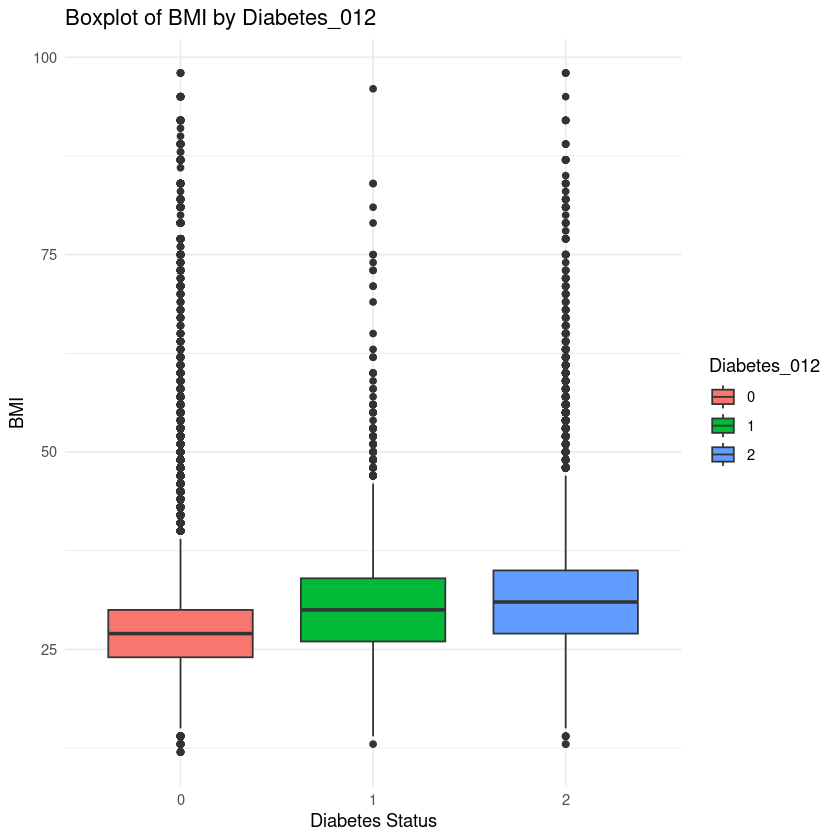

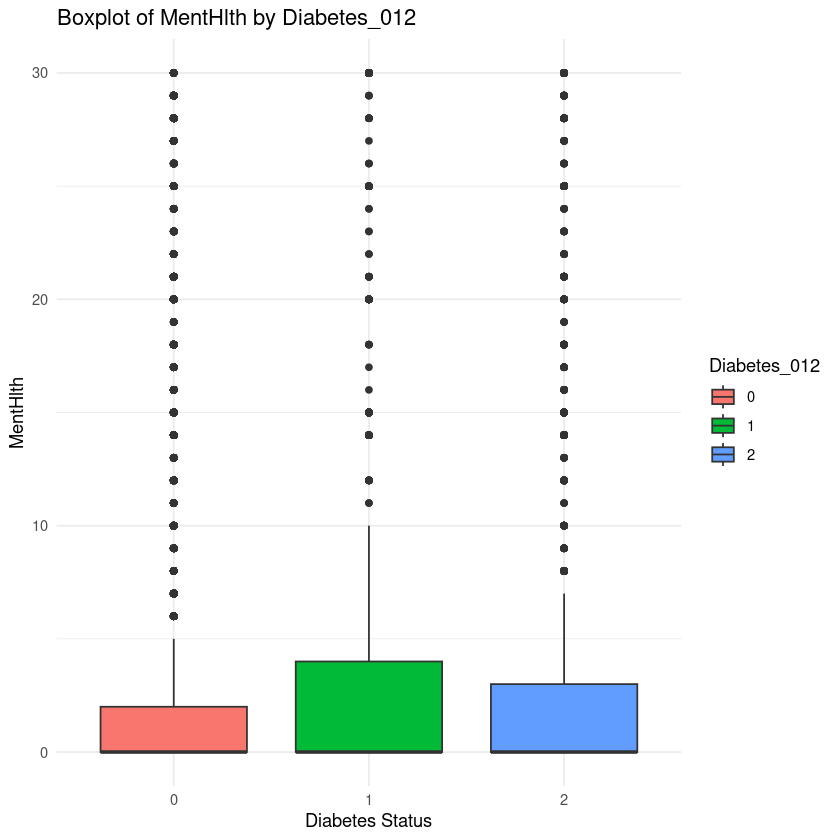

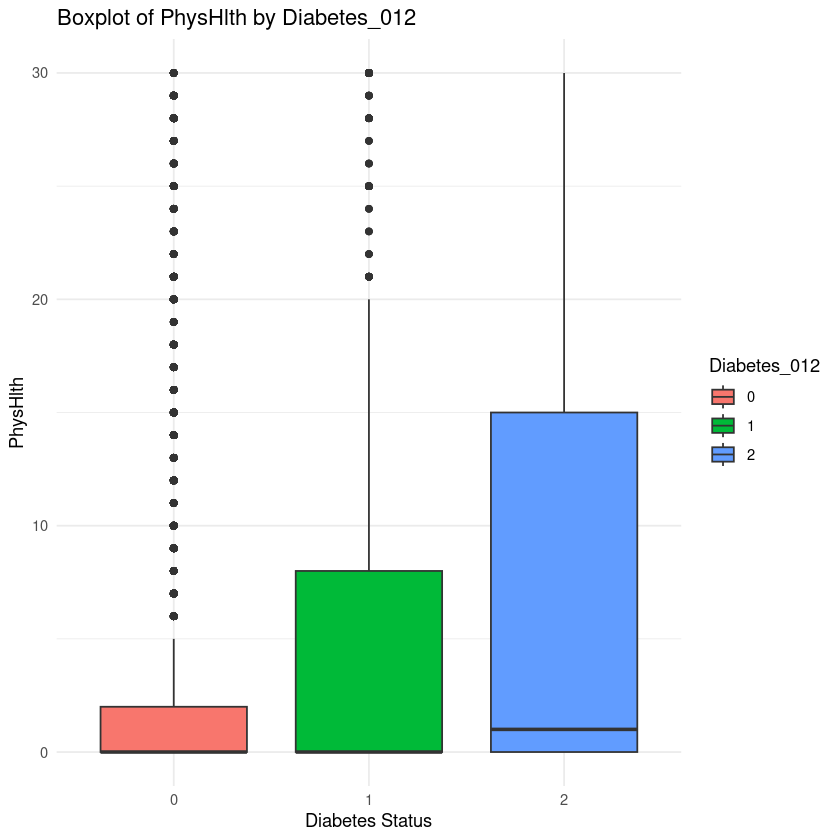

In [44]:
ggplot(quantitative_data, aes(x = Diabetes_012, y = BMI, fill = Diabetes_012)) +
  geom_boxplot() +
  labs(title = "Boxplot of BMI by Diabetes_012", x = "Diabetes Status", y = "BMI") +
  theme_minimal()

ggplot(quantitative_data, aes(x = Diabetes_012, y = MentHlth, fill = Diabetes_012)) +
  geom_boxplot() +
  labs(title = "Boxplot of MentHlth by Diabetes_012", x = "Diabetes Status", y = "MentHlth") +
  theme_minimal()

ggplot(quantitative_data, aes(x = Diabetes_012, y = PhysHlth, fill = Diabetes_012)) +
  geom_boxplot() +
  labs(title = "Boxplot of PhysHlth by Diabetes_012", x = "Diabetes Status", y = "PhysHlth") +
  theme_minimal()

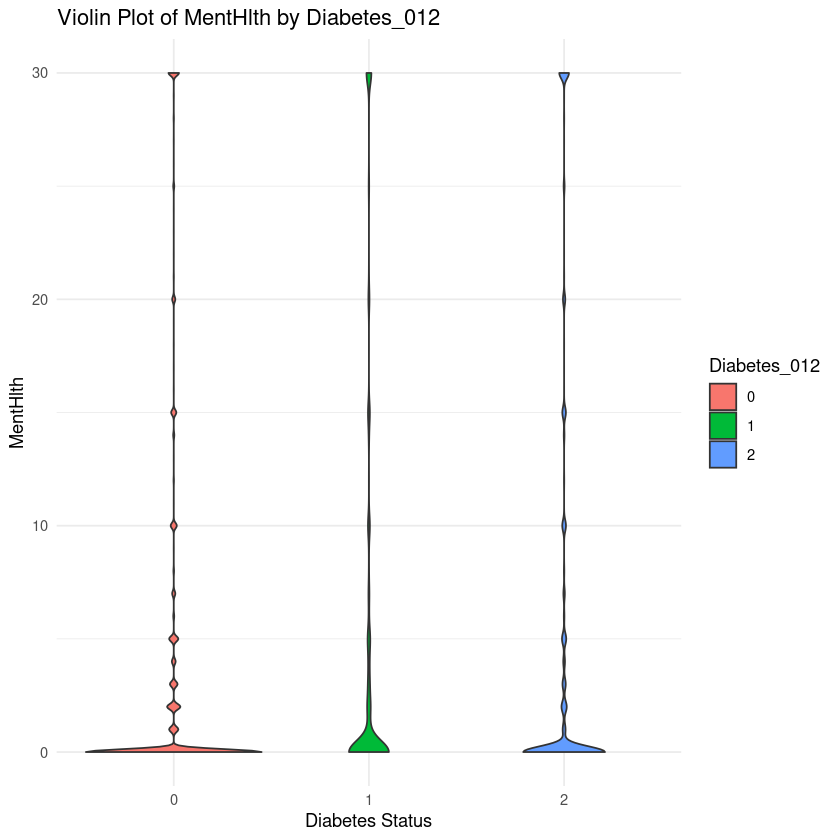

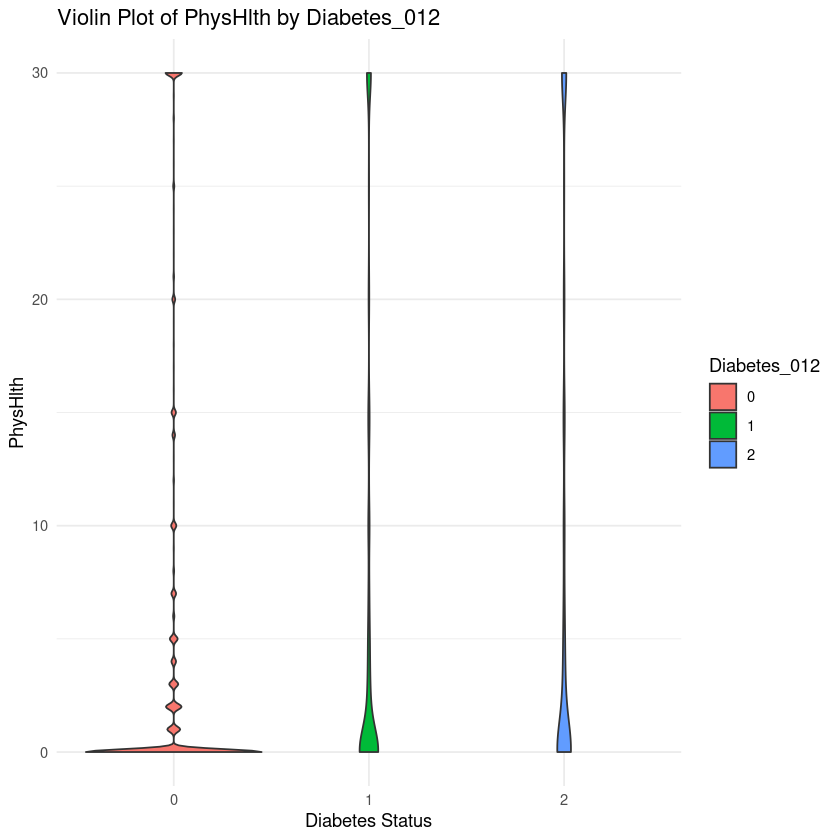

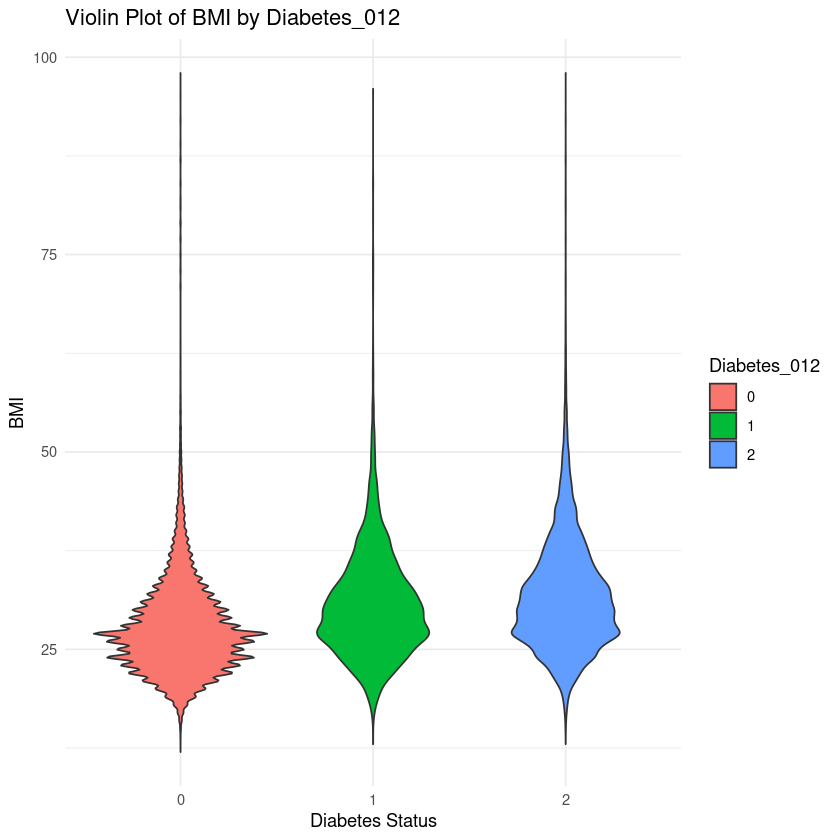

In [46]:
ggplot(quantitative_data, aes(x = Diabetes_012, y = MentHlth, fill = Diabetes_012)) +
  geom_violin() +
  labs(title = "Violin Plot of MentHlth by Diabetes_012", x = "Diabetes Status", y = "MentHlth") +
  theme_minimal()

ggplot(quantitative_data, aes(x = Diabetes_012, y = PhysHlth, fill = Diabetes_012)) +
    geom_violin() +
    labs(title = "Violin Plot of PhysHlth by Diabetes_012", x = "Diabetes Status", y = "PhysHlth") +
    theme_minimal()

ggplot(quantitative_data, aes(x = Diabetes_012, y = BMI, fill = Diabetes_012)) +
    geom_violin() +
    labs(title = "Violin Plot of BMI by Diabetes_012", x = "Diabetes Status", y = "BMI") +
    theme_minimal()

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


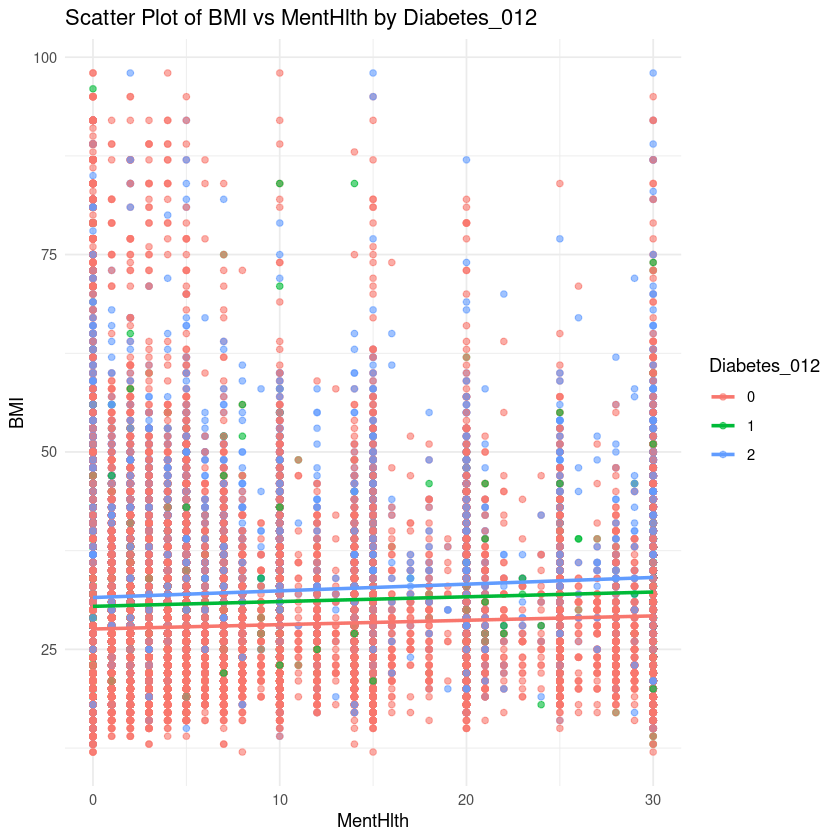

`geom_smooth()` using formula = 'y ~ x'


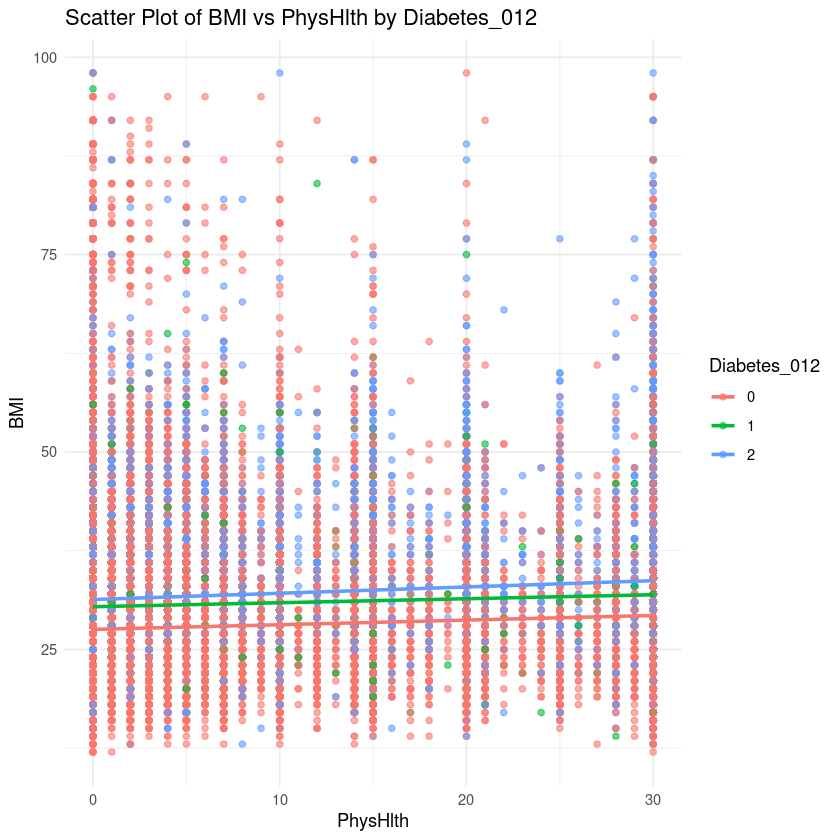

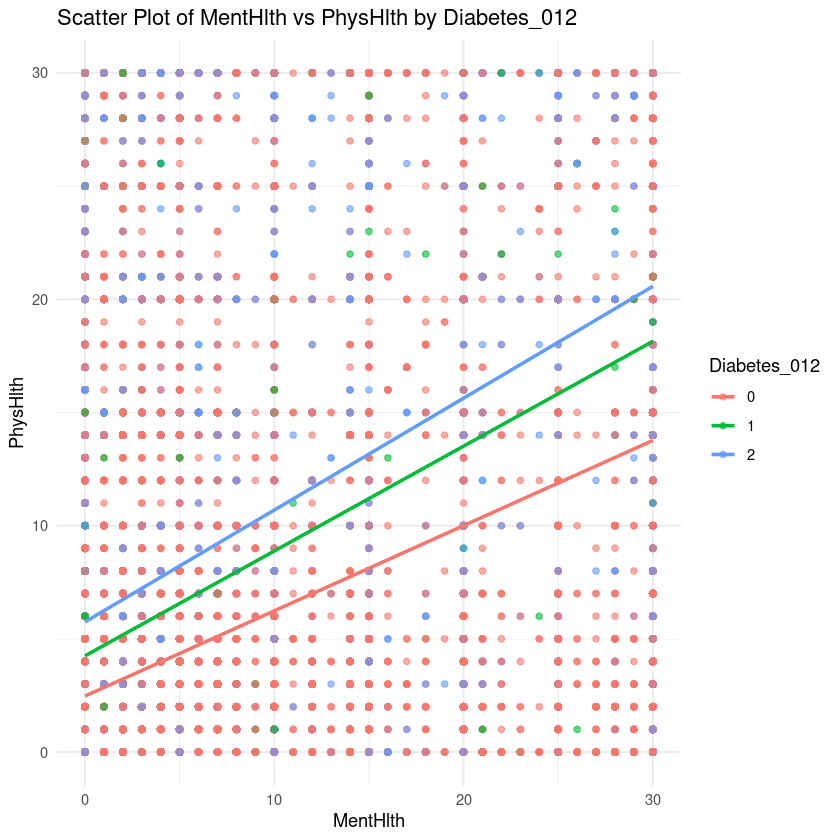

In [49]:
ggplot(quantitative_data, aes(x = MentHlth, y = BMI, color = Diabetes_012)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Scatter Plot of BMI vs MentHlth by Diabetes_012", x = "MentHlth", y = "BMI") +
  theme_minimal()

ggplot(quantitative_data, aes(x = PhysHlth, y = BMI, color = Diabetes_012)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Scatter Plot of BMI vs PhysHlth by Diabetes_012", x = "PhysHlth", y = "BMI") +
  theme_minimal()

ggplot(quantitative_data, aes(x = MentHlth, y = PhysHlth, color = Diabetes_012)) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE) +
  labs(title = "Scatter Plot of MentHlth vs PhysHlth by Diabetes_012", x = "MentHlth", y = "PhysHlth") +
  theme_minimal()

## 1. So sánh **BMI** qua 3 nhóm Diabetes_012
 
- **Nhóm 0 (không tiểu đường)**:  
  - Median BMI thường **thấp hơn** hai nhóm còn lại, ở mức khoảng 25–26.  
  - Dải IQR tầm [22–30], và vẫn có nhiều outlier lên tới 70, 80, thậm chí 100.  
- **Nhóm 1 (tiền tiểu đường)**:  
  - Median BMI nhỉnh hơn, khoảng 28.  
  - Dải IQR cũng [25–32], và vẫn có những outlier rất cao.  
- **Nhóm 2 (tiểu đường)**:  
  - Median BMI tiệm cận khoảng 29–30, cao hơn so với nhóm 0.  
  - Tương tự, outlier kéo dài đến 90–100.  

Quan sát này phù hợp với hiểu biết y khoa: **người tiền tiểu đường / tiểu đường** thường có BMI cao hơn trung bình so với người không mắc. Dù vậy, phân phối BMI vẫn có độ trải rộng lớn trong từng nhóm.

## 2. So sánh **MentHlth** qua 3 nhóm Diabetes_012

- Cả 3 nhóm đều có **median MentHlth** nằm rất thấp (đa số = 0), vì phần lớn người được khảo sát không ghi nhận ngày “tinh thần kém”.  
- Dù vậy, ta vẫn bắt gặp những outlier tới 30 ngày ở cả ba nhóm.  
- Khác biệt giữa median các nhóm 0, 1, 2 có vẻ **rất nhỏ**; có thể nhóm 1 (tiền tiểu đường) hơi cao hơn một chút so với 0 và 2, nhưng không rõ rệt.

Vậy, **số ngày tinh thần kém** (MentHlth) không tỏ ra khác biệt lớn giữa ba nhóm tiểu đường. Nếu có, có thể là rất nhẹ và cần kiểm định thống kê (như Kruskal–Wallis) để xác nhận.

## 3. So sánh **PhysHlth** qua 3 nhóm Diabetes_012

- **Nhóm 0**: Median PhysHlth gần 0–1, IQR thấp, nhưng có nhiều outlier (một số ít người có 20–30 ngày ốm).  
- **Nhóm 1**: Median PhysHlth cao hơn, khoảng 3–5 ngày kém sức khỏe thể chất.  
- **Nhóm 2**: Median PhysHlth rõ ràng **cao nhất**, có thể trên 5–6 ngày, IQR rộng, và outlier lên tới 30 ngày.  

Qua đó, có vẻ **nhóm tiểu đường** (2) và **nhóm tiền tiểu đường** (1) có xu hướng gặp nhiều ngày sức khỏe thể chất kém hơn nhóm không tiểu đường (0). Sự khác biệt này khá trực quan trên boxplot, cho thấy tần suất ngày ốm cao hơn ở người tiền tiểu đường và tiểu đường.

## 4. Scatter Plot và mối liên hệ bộ ba: BMI, MentHlth, PhysHlth, Diabetes_012

1. **BMI ~ MentHlth, phân tách theo Diabetes_012**  
   - Đường hồi quy cho mỗi nhóm (màu khác nhau) dốc lên **nhẹ** (tương quan yếu giữa BMI và MentHlth), trong đó nhóm 2 (tiểu đường) thường nằm phía trên một chút (BMI cao hơn).  
   - Nói chung, MentHlth tăng không kéo theo BMI tăng rõ rệt, nhưng người đã tiểu đường (màu xanh) có BMI trung bình cao hơn hai nhóm còn lại.

2. **BMI ~ PhysHlth, phân tách theo Diabetes_012**  
   - Xu hướng tương tự: tương quan giữa BMI và PhysHlth chỉ hơi dương, độ dốc rất nhỏ.  
   - Nhóm 2 (tiểu đường) vẫn nhỉnh hơn về BMI trung bình, đồng thời PhysHlth cũng cao hơn.

3. **MentHlth ~ PhysHlth, phân tách theo Diabetes_012**  
   - Cả 3 đường hồi quy (3 màu) đều có **độ dốc dương**: càng nhiều ngày tinh thần kém, càng nhiều ngày thể chất kém.  
   - Đáng chú ý, nhóm 2 (tiểu đường) dường như có đường hồi quy **cao nhất**, rồi đến nhóm 1, rồi nhóm 0. Cho thấy **người tiểu đường** vừa có MentHlth, PhysHlth cao hơn trung bình (ngày kém nhiều), vừa có BMI cao hơn.

## 5. Kết luận chính

1. **BMI cao** hơn ở nhóm 1 (tiền tiểu đường) và nhóm 2 (tiểu đường) so với nhóm 0, phù hợp với quan sát lâm sàng (béo phì là yếu tố nguy cơ cho tiểu đường).  
2. **PhysHlth** cho thấy sự **phân tầng rõ**: nhóm 2 > nhóm 1 > nhóm 0 (số ngày ốm nhiều nhất ở người đã mắc tiểu đường).  
3. **MentHlth** không khác biệt nhiều giữa các nhóm tiểu đường, tuy nhiên nhóm 1 có median hơi cao hơn nhóm 0, và nhóm 2 thì thấp hơn chút xíu (có thể do cỡ mẫu hoặc hành vi báo cáo khác nhau).  
4. **MentHlth và PhysHlth** vẫn tương quan dương, và mức độ này có vẻ **cao hơn** trong nhóm tiểu đường (người sức khỏe tinh thần kém cũng thường kèm thể chất kém).  
5. Để kiểm định chính thức, ta có thể làm:
   - **ANOVA / Kruskal–Wallis** cho sự khác biệt BMI giữa 3 nhóm Diabetes_012.  
   - **Kruskal–Wallis** cho MentHlth và PhysHlth (vì biến đếm, nhiều zero).
Những phân tích sơ bộ này gợi ý:  
- BMI là **biến phân biệt** tốt giữa người có và không có tiểu đường.  
- PhysHlth cũng có phân phối khác biệt khi so sánh nhóm tiểu đường với nhóm bình thường.  
- MentHlth ít có sự “chia rẽ” giữa các nhóm tiểu đường, song vẫn thể hiện tương quan với PhysHlth trong cả 3 nhóm.  

Tất cả điều này giúp ta hiểu rõ hơn về **đặc trưng** của mỗi nhóm và có cơ sở để xây dựng **mô hình phân loại** (chẳng hạn Random Forest, Logistic Regression, v.v.) với BMI và PhysHlth (và các biến khác) là **predictor** quan trọng.